In [1]:
library(ggplot2)
library(dplyr)
library(lubridate)
library(tidyverse)



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



Attaching package: 'lubridate'


The following objects are masked from 'package:base':

    date, intersect, setdiff, union


-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats 1.0.0     v stringr 1.5.0
v purrr   1.0.2     v tibble  3.2.1
v readr   2.1.5     v tidyr   1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
oscar_data <- read_csv('../../../data/processed/space_infrastructure/satellite_data/oscar_satellites.csv')

head(oscar_data)


Rows: 900 Columns: 14
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (10): acronym, satellite_programme, agencies, orbit, altitude, longitud...
dbl   (1): sat_id
dttm  (3): launch_date, expected_eol_date, last_update

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


acronym,sat_id,launch_date,expected_eol_date,satellite_programme,agencies,orbit,altitude,longitude,inclination,ect,sat_status,payload,last_update
<chr>,<dbl>,<dttm>,<dttm>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dttm>
ACE,454,1997-08-25,2026-11-30,Advanced Composition Explorer,['NASA'],L1,1.5e+06 km,NA,NA,NA,Operational,"['CRIS (ACE)', 'EPAM', 'MAG (ACE)', 'SEPICA ', 'SIS', 'SWEPAM', 'SWICS', 'SWIMS', 'ULEIS']",2024-01-22 08:16:00
ACRIMSat,1,1999-12-20,2013-12-14,Active Cavity Radiometer Irradiance Monitor Satellite,['NASA'],SunSync,696 km,NA,NA,10:50 desc,Inactive,['ACRIM-III'],2015-07-27 19:40:00
ADEOS,2,1996-08-17,1997-06-30,"Advanced Earth Observing Satellite (original name: ""Midori"")",['JAXA'],SunSync,797 km,NA,NA,10:30 desc,Inactive,"['AVNIR', 'ILAS-I', 'IMG', 'NSCAT', 'OCTS', 'POLDER', 'RIS', 'TOMS']",2015-07-27 19:41:00
ADEOS-2,3,2002-12-14,2003-10-25,"Advanced Earth Observing Satellite (original name: ""Midori"")",['JAXA'],SunSync,812 km,NA,NA,10:30 desc,Inactive,"['AMSR', 'DCS (ADEOS)', 'GLI', 'ILAS-II', 'POLDER', 'SeaWinds']",2015-07-27 19:42:00
Aditya-1,469,2023-09-02,2027-11-30,Aditya,['ISRO'],L1,1500000 km,NA,NA,NA,Commissioning,"['ASPEX', 'HEL1OS', 'Magnetometer (Aditya)', 'PAPA', 'SUIT', 'SoLEXS', 'VELC']",2024-01-08 10:47:00
Aeolus,4,2018-08-22,2023-04-30,Aeolus,['ESA'],SunSync,320 km,NA,NA,06:00 desc,Inactive,['ALADIN'],2023-12-11 13:55:00


In [3]:
# filter out observations with past 2023
oscar_data <- oscar_data %>% 
  mutate(launch_date = as.Date(launch_date)) %>% 
  filter(launch_date <= as.Date("2023-12-31"))


# remove unnecesary
oscar_data <- oscar_data %>%
  filter(!sat_status %in% c("Planned", "Commissioning"))



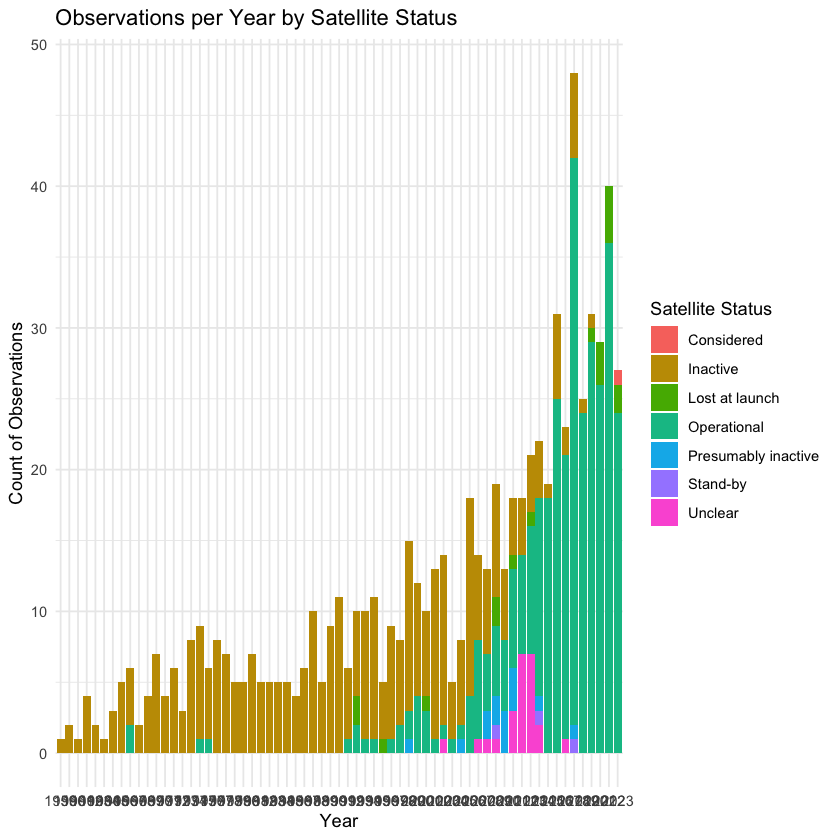

In [4]:
# make data type
oscar_data$launch_date <- as.Date(oscar_data$launch_date)



# extract the year
oscar_data$year <- year(oscar_data$launch_date)

# prelim plot

ggplot(oscar_data, aes(x = factor(year), fill = sat_status)) +
  geom_bar() +
  labs(x = "Year", y = "Count of Observations", fill = "Satellite Status", title = "Observations per Year by Satellite Status") +
  theme_minimal()

In [5]:

# recategorize sat_status
oscar_data$sat_status <- oscar_data$sat_status %>% 
  factor() %>% 
  fct_lump_n(2) %>% 
  fct_recode(Operational = "Operational", Inactive = "Inactive", Other = "Other")


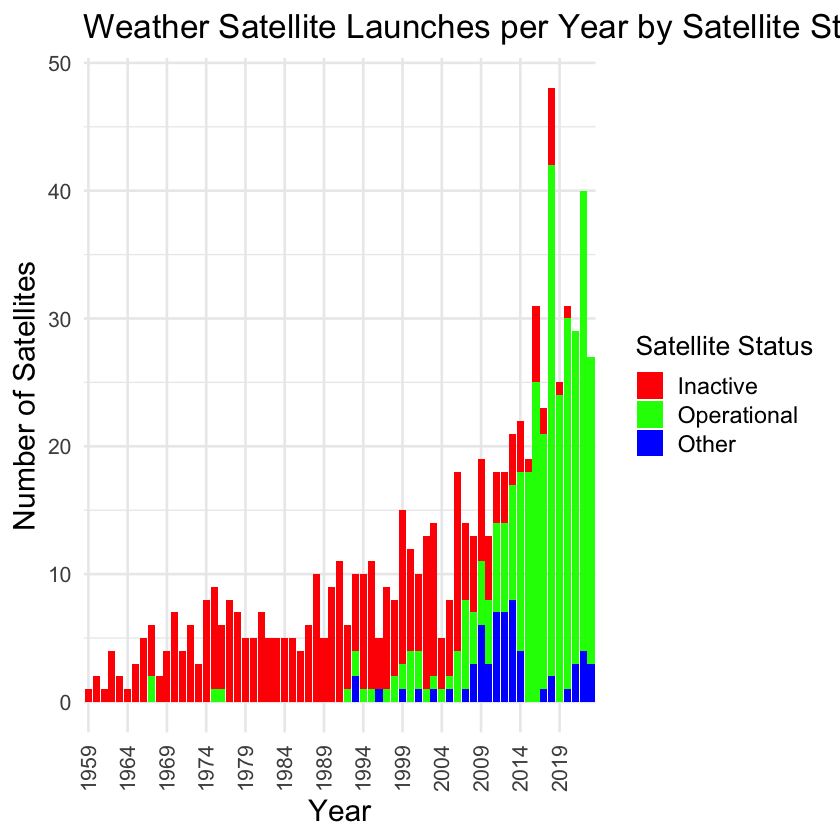

In [6]:



# plot
plot <- ggplot(oscar_data, aes(x = factor(year(launch_date)), fill = sat_status)) +
  geom_bar() +
  scale_fill_manual(values = c("Operational" = "green", "Inactive" = "red", "Other" = "blue")) +
  labs(x = "Year", y = "Number of Satellites", fill = "Satellite Status", 
       title = "Weather Satellite Launches per Year by Satellite Status") +
  theme_minimal(base_size = 16) + 
  theme(plot.title = element_text(size = 20), 
        axis.title = element_text(size = 18), 
        legend.title = element_text(size = 16), 
        legend.text = element_text(size = 14), 
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1)) + 
  scale_x_discrete(breaks = function(x) x[seq(1, length(x), by = 5)]) 

plot



In [7]:
ggsave("../../docs_source/images/visualization/oscar_satellites_status.jpeg", plot, width = 12, height = 8)

